## <center> From Decision Trees to Random Forests

## <center> Growing Supervised Machine Learning Models

<center> <b>Contact Lens Type Determination</b> <br><br>
<center><img src='decision_tree.png' height=700 width=700>

## <center>Two algorithms

### <center> ID3
<center>Iterative Dichotomiser 3 (Classification only) 

### <center> CART   </center>
<center>Classification and Regression Trees </center>

## ID3

### <center> Entropy

<center><img src='entropy.png'>

<center><img src="entropy_formula.png">

In [221]:
-((1/2)*np.log(1/2)+(1/2)*np.log(1/2))

0.6931471805599453

### <center> Information Gain

<center>The reduction of uncertainty about Y given an additional piece of information X about Y.

<center><img src='ig_formula.png'>

## <center> Building a Decision Tree From Scratch (ID3)

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame()
df['Older Than 30'] = [False, True, True, False, True]
df['Occupation'] = ['Doctor', 'Lawyer', 'Truck Driver', 'Doctor', 'Truck Driver']
df['Income Over 80000'] = [True, True, False, False, True]
df['Approved'] = [True, True, False, False, False]
df

,Older Than 30,Occupation,Income Over 80000,Approved
0,False,Doctor,True,True
1,True,Lawyer,True,True
2,True,Truck Driver,False,False
3,False,Doctor,False,False
4,True,Truck Driver,True,False


In [2]:
## Number approved/not approved
df['Approved'].value_counts()
approved = df[df['Approved']==True]
not_approved = df[df['Approved']==False]
total = len(df)

In [3]:
## Entropy of parent node
entropy_parent = -((len(approved)/total)*np.log(len(approved)/total)+
                   (len(not_approved)/total)*np.log(len(not_approved)/total))
entropy_parent

0.6730116670092565

In [4]:
## Entropy and Information Gain of Age
older = df[df['Older Than 30']==True]
younger = df[df['Older Than 30']==False]

weight_older = len(older)/total
weight_younger = len(younger)/total

older_approved = older[older['Approved']==True]
older_not_approved = older[older['Approved']==False]
younger_approved = younger[younger['Approved']==True]
younger_not_approved = older[older['Approved']==False]

entropy_older = -((len(older_approved)/len(older))*np.log(len(older_approved)/len(older))
                  +(len(older_not_approved)/len(older))*np.log(len(older_not_approved)/len(older)))

entropy_younger = -((len(younger_approved)/len(younger))*np.log(len(younger_approved)/len(younger))
                  +(len(younger_not_approved)/len(younger))*np.log(len(younger_not_approved)/len(younger)))

entropy_age = entropy_older*weight_older + entropy_younger*weight_younger
ig_age = entropy_parent - entropy_age
print('Information Gain (Age):', ig_age)

Information Gain (Age): 0.15247372992037977


In [5]:
def entropy(count_true, count_false, count_total):
    true = (count_true/count_total)*np.log(count_true/count_total) if count_true > 0 else 0
    false = (count_false/count_total)*np.log(count_false/count_total) if count_false > 0 else 0
    return -(true + false)

In [6]:
## Entropy and Information Gain of Occupation
occupations = list(df['Occupation'].value_counts().index)
occupation_dfs = [df[df['Occupation']==i] for i in occupations]
occupation_weights = [len(i)/total for i in occupation_dfs]
occupation_approved = [i[i['Approved']==True] for i in occupation_dfs]
occupation_not_approved = [i[i['Approved']==False] for i in occupation_dfs]

entropy_occupation = np.sum([entropy(len(x), len(y), len(occupation))*weight for x,y,occupation,weight 
                                         in zip(occupation_approved, occupation_not_approved, 
                                                        occupation_dfs, occupation_weights)])
                                                                                         
ig_occupation = entropy_parent - entropy_occupation
print('Information Gain (Occupation):', ig_occupation)

Information Gain (Occupation): 0.3957527947852784


In [7]:
## Entropy and Information Gain of Income
incomes = list(df['Income Over 80000'].value_counts().index)
income_dfs = [df[df['Income Over 80000']==i] for i in incomes]
income_weights = [len(i)/total for i in income_dfs]
income_approved = [i[i['Approved']==True] for i in income_dfs]
income_not_approved = [i[i['Approved']==False] for i in income_dfs]

entropy_income = np.sum([entropy(len(x), len(y), len(income))*weight for x,y,income,weight
                                         in zip(income_approved, income_not_approved, 
                                                        income_dfs, income_weights)])
                                                                                         
ig_income = entropy_parent - entropy_income
print('Information Gain (Income):', ig_income)

Information Gain (Income): 0.29110316603236885


In [8]:
print('Information Gains')
p=[print(i,":",j) for i,j in zip(['Age','Occupation','Income'],[ig_age, ig_occupation, ig_income])]

Information Gains
Age : 0.15247372992037977
Occupation : 0.3957527947852784
Income : 0.29110316603236885


In [9]:
for occupation in occupations:
    ## calculate parent entropy
    o_df = df[df['Occupation']==occupation]
    o_total = len(o_df)
    true = len(o_df[o_df['Approved']==True])
    false = len(o_df[o_df['Approved']==False])
    p_entropy = entropy(true,false,o_total)
    ## calculate children entropy
    ## Age
    ages = list(o_df['Older Than 30'].value_counts().index)
    age_dfs = [o_df[o_df['Older Than 30']==i] for i in ages]
    age_weights = [len(i)/o_total for i in age_dfs]
    age_approved = [i[i['Approved']==True] for i in age_dfs]
    age_not_approved = [i[i['Approved']==False] for i in age_dfs]
    entropy_age = np.sum([entropy(len(x), len(y), len(age))*weight for x,y,age,weight
                                     in zip(age_approved, age_not_approved, 
                                                    age_dfs, age_weights)])                                                                  
    ig_age = entropy_parent - entropy_age
    ## Income
    incomes = list(o_df['Income Over 80000'].value_counts().index)
    income_dfs = [o_df[o_df['Income Over 80000']==i] for i in incomes]
    income_weights = [len(i)/o_total for i in income_dfs]
    income_approved = [i[i['Approved']==True] for i in income_dfs]
    income_not_approved = [i[i['Approved']==False] for i in income_dfs]
    entropy_income = np.sum([entropy(len(x), len(y), len(income))*weight for x,y,income,weight
                                     in zip(income_approved, income_not_approved, 
                                                    income_dfs, income_weights)])                                                                  
    ig_income = entropy_parent - entropy_income
    print(occupation, '--', 'Age' if ig_age>ig_income else 'Income')

Doctor -- Income
Truck Driver -- Income
Lawyer -- Income


In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [11]:
## convert features to categories
for i in df.columns:
    df[i] = df[i].astype('category').cat.codes
## fit model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(df.drop('Approved',axis=1), df['Approved'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
import matplotlib.pyplot as plt
plot_tree(clf,node_ids=False,
              impurity=False,
              label=None,
              filled=True,
              feature_names=df.drop('Approved',axis=1).columns, 
              class_names=['Approved','Not Approved'])
plt.show()

<Figure size 640x480 with 1 Axes>

## <center> Activity

<center>Using the data in data_scientists.csv, build a decision tree from scratch to predict whether or not someone is a Data Scientist.

<center>Then, build the tree in Python and compare.

Steps:
    - Find the entropy of the target.
    - Find the weighted entropy for each feature.
    - Calculate the information gain for each feature.
    - Select the feature with the highest IG as the root node.
    - Repeat process, finding entropy of root node, then entropy of children, and compare IG.

In [20]:
df = pd.read_csv('data_scientists.csv')
df

,Uses Jupyter Notebooks,Is Stressed,Drinks Coffee,Data Scientist
0,True,True,False,True
1,False,False,True,False
2,True,True,True,True
3,True,True,True,True
4,False,True,False,False
5,True,False,True,True
6,True,False,False,False


In [29]:
ds_true = df[df['Data Scientist']==True]
ds_false = df[df['Data Scientist']==False]
ds_entropy = entropy(len(ds_true),len(ds_false),len(df))
for feature in df.drop('Data Scientist',axis=1).columns:
    classes = list(df[feature].value_counts().index)
    classes_dfs = [df[df[feature]==i] for i in classes]
    classes_weights = [len(i)/len(df) for i in classes_dfs]
    classes_ds = [i[i['Data Scientist']==True] for i in classes_dfs]
    classes_not_ds = [i[i['Data Scientist']==False] for i in classes_dfs]

    feature_entropy = np.sum([entropy(len(x), len(y), len(c))*weight for x,y,c,weight 
                                             in zip(classes_ds, classes_not_ds, classes_dfs, classes_weights)])

    feature_ig = ds_entropy - feature_entropy
    print('Information Gain', feature,':',feature_ig)

Information Gain Uses Jupyter Notebooks : 0.32547780217319466
Information Gain Is Stressed : 0.08878194993480437
Information Gain Drinks Coffee : 0.08878194993480437


In [40]:
## choosing Is Stressed as next parent node
stressed_true = df[df['Uses Jupyter Notebooks']==True]
stressed_false = df[df['Uses Jupyter Notebooks']==False]
stressed_entropy = entropy(len(ds_true),len(ds_false),len(df))
for feature in df.drop(['Data Scientist','Uses Jupyter Notebooks'],axis=1).columns:
    classes = list(df[feature].value_counts().index)
    classes_dfs = [df[df[feature]==i] for i in classes]
    classes_weights = [len(i)/len(df) for i in classes_dfs]
    classes_ds = [i[i['Data Scientist']==True] for i in classes_dfs]
    classes_not_ds = [i[i['Data Scientist']==False] for i in classes_dfs]

    feature_entropy = np.sum([entropy(len(x), len(y), len(c))*weight for x,y,c,weight 
                                             in zip(classes_ds, classes_not_ds, classes_dfs, classes_weights)])

    feature_ig = ds_entropy - feature_entropy
    print('Information Gain', feature,':',feature_ig)

Information Gain Is Stressed : 0.08878194993480437
Information Gain Drinks Coffee : 0.08878194993480437


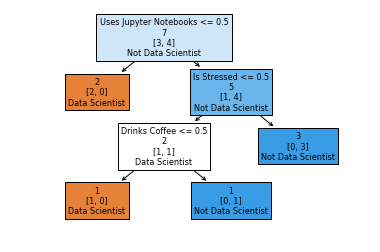

In [44]:
for i in df.columns:
    df[i] = df[i].astype('category').cat.codes
## fit model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(df.drop('Data Scientist',axis=1), df['Data Scientist'])
import matplotlib.pyplot as plt
plot_tree(clf,node_ids=False,
              impurity=False,
              label=None,
              filled=True,
              feature_names=df.drop('Data Scientist',axis=1).columns, 
              class_names=['Data Scientist','Not Data Scientist'])
plt.show()

### <center>CART

<center>Similar to ID3, except for the formula used in determining branches. <br>
Newer, more common algorithm, default in DecisionTreeClassifer/DecisionTreeRegressor.

<center><img src="gini_formula.png">

### Decision Trees for Regression

In [56]:
from sklearn.datasets import make_regression, make_classification
X,y = make_regression(n_samples=10,n_features=2, n_informative=2, random_state=47)

In [57]:
reg_df = pd.DataFrame(X)
reg_df.columns = ['X'+str(i+1) for i in range(len(reg_df.columns))]
reg_df['target'] = y
reg_df

,X1,X2,target
0,0.794958,0.436606,46.768726
1,0.087662,0.719533,41.201809
2,-0.943156,-0.932340,-77.732012
3,1.305906,-0.848009,-7.203624
4,1.104180,-1.393727,-42.421202
5,0.051794,-1.322748,-69.493892
6,1.797761,-1.054737,-3.868167
7,0.640412,0.924208,68.411077
8,0.823623,-1.012787,-30.203021
9,-0.592471,-0.294650,-33.205400


In [58]:
from sklearn.tree import DecisionTreeRegressor
reg_clf = DecisionTreeRegressor().fit(X,y)

In [59]:
x_vals = np.linspace(-3,3,100)
y_vals = np.linspace(-3,3,100)
preds = []
for x_ in x_vals:
    for y_ in y_vals:
        pred = reg_clf.predict(np.array([x_, y_]).reshape(1,-1))
        preds.append(pred[0])

In [60]:
set(y)==set(preds)

True

### <center> In regression, decision trees can only predict values in the training set.

## <center> Tuning Decision Trees

<center> <b>Parameters</b><br><br>
<center> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTreeClassifier Documentation</a>
<center> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor Documentation</a> 

In [61]:
## make dataset
X,y = make_regression(n_samples=1000,n_features=10, n_informative=8, random_state=47)
## train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=47)
## fit base model
base_model = DecisionTreeRegressor().fit(X_train,y_train)
## train/test accuracy
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE:', mean_squared_error(y_train, base_model.predict(X_train)))
print('Train R2:', r2_score(y_train, base_model.predict(X_train)));print('')
print('Test MSE:', mean_squared_error(y_test, base_model.predict(X_test)))
print('Test R2:', r2_score(y_test, base_model.predict(X_test)))

Train MSE: 0.0
Train R2: 1.0

Test MSE: 5026.395489537615
Test R2: 0.6753974701280121


In [62]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[5,10,20], 
              'min_samples_split':[0.5,1.0,2,3],
              'max_features':['auto',None],
              'min_impurity_decrease':[0,0.5,0.75]
             }
dtr = DecisionTreeRegressor()
grid_search_model = GridSearchCV(dtr, params,scoring='r2', verbose=1)
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['auto', None],
                         'min_impurity_decre

In [63]:
grid_search_model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_impurity_decrease': 0.75,
 'min_samples_split': 3}

In [64]:
best_model = grid_search_model.best_estimator_
print('Train MSE:', mean_squared_error(y_train, best_model.predict(X_train)))
print('Train R2:', r2_score(y_train, best_model.predict(X_train)));print('')
print('Test MSE:', mean_squared_error(y_test, best_model.predict(X_test)))
print('Test R2:', r2_score(y_test, best_model.predict(X_test)))

Train MSE: 169.34630922886987
Train R2: 0.9903480075320004

Test MSE: 5222.621069285318
Test R2: 0.6627253038123525


## <center> Activity

- Use the data in disease_prediction.csv to build a model to predict whether or not a person is likely to have a disease.<br><br>
- Choose the appropriate measures of model success and scoring metrics to fit the best model. <br><br>
- Utitlize GridSearchCV to tune your decision tree model.

In [48]:
df = pd.read_csv('disease_prediction.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Target
0,-0.034523,3.608020,1.218602,-3.088745,-1.830222,-1.347290,1.309101,0.472154,-2.063063,0.713326,1.449714,-1.388035,-1.235700,0.354369,5.139164,0
1,-3.982620,-1.519580,2.607753,1.352610,-0.492727,0.451896,-1.234259,-0.306009,-3.189432,-2.472089,2.373689,0.707191,-0.689186,-0.172267,-2.086183,0
2,1.935644,-0.463844,-0.711184,-1.162659,0.479820,-0.462172,1.783586,-1.670872,-2.005233,-0.582234,-0.984213,4.108262,0.393325,0.576208,0.554480,1
3,-2.937114,0.828235,-4.950897,-2.832968,-0.235300,0.875254,-1.514857,2.216442,1.868948,0.977231,7.081432,3.606751,-2.555186,0.898066,-0.782740,0
4,2.307148,-0.189785,-4.001813,-2.935185,-3.478831,-3.913828,1.747009,-1.566167,-2.882905,-1.522174,-8.079017,-4.874132,3.105106,4.652884,-1.559585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.357207,-0.667761,-3.538712,2.222158,-2.712089,3.853266,0.890923,-1.038749,1.112444,-0.487584,0.027832,3.667807,1.444183,-5.002966,-0.303842,1
996,0.227382,0.534173,-9.133174,-1.063166,-2.446178,3.269559,-0.191263,-0.952319,0.690111,-1.405286,-1.212993,2.229130,0.328727,-1.047072,-3.738128,0
997,2.339805,0.226301,0.077764,-1.860009,4.641882,-2.517670,1.584756,-0.788474,-0.822288,0.403484,0.471164,2.764739,2.157224,0.366475,0.958183,1
998,-0.253359,-1.660263,1.088776,0.364069,-0.884684,2.369242,-0.923348,-0.013337,-2.944915,-2.014761,-2.102847,-1.601085,0.667960,-0.024819,-0.478166,0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, confusion_matrix

X = df.drop('Target',axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=47)
base_model = DecisionTreeClassifier().fit(X_train,y_train)

print('Train Accuracy:', accuracy_score(y_train, base_model.predict(X_train)))
print('Train F1:', f1_score(y_train, base_model.predict(X_train)))
print('Train Precision:', precision_score(y_train, base_model.predict(X_train)))
print('Train Recall:', recall_score(y_train, base_model.predict(X_train)));print('')
print('Test Accuracy:', accuracy_score(y_test, base_model.predict(X_test)))
print('Test F1:', f1_score(y_test, base_model.predict(X_test)))
print('Test Precision:', precision_score(y_test, base_model.predict(X_test)))
print('Test Recall:', recall_score(y_test, base_model.predict(X_test)))

Train Accuracy: 1.0
Train F1: 1.0
Train Precision: 1.0
Train Recall: 1.0

Test Accuracy: 0.6933333333333334
Test F1: 0.6973684210526315
Test Precision: 0.7681159420289855
Test Recall: 0.6385542168674698


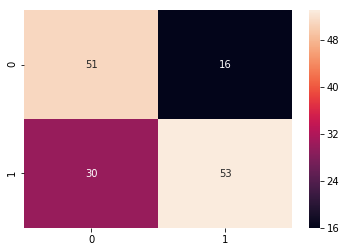

In [67]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, base_model.predict(X_test)),annot=True)

In [79]:
params = {'max_depth':[5,10,20], 
              'min_samples_split':[0.5,1.0,2,3],
              'max_features':['auto',None],
              'min_impurity_decrease':[0,0.5,0.75],
              'max_leaf_nodes':[2,3,None]
             }
dtc = DecisionTreeClassifier()
grid_search_model = GridSearchCV(dtc, params,scoring='accuracy', verbose=1)
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    7.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20],
                        

In [80]:
best_model = grid_search_model.best_estimator_
print('Train Accuracy:', accuracy_score(y_train, best_model.predict(X_train)))
print('Train F1:', f1_score(y_train, best_model.predict(X_train)))
print('Train Precision:', precision_score(y_train, best_model.predict(X_train)))
print('Train Recall:', recall_score(y_train, best_model.predict(X_train)));print('')
print('Test Accuracy:', accuracy_score(y_test, best_model.predict(X_test)))
print('Test F1:', f1_score(y_test, best_model.predict(X_test)))
print('Test Precision:', precision_score(y_test, best_model.predict(X_test)))
print('Test Recall:', recall_score(y_test, best_model.predict(X_test)))

Train Accuracy: 1.0
Train F1: 1.0
Train Precision: 1.0
Train Recall: 1.0

Test Accuracy: 0.72
Test F1: 0.7341772151898734
Test Precision: 0.7733333333333333
Test Recall: 0.6987951807228916


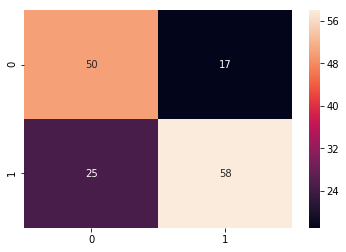

In [81]:
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)),annot=True)